# finterstellar = fs
금융 데이터를 분석하고, 투자 전략의 성과를 평가하며, 매수/매도 신호 생성 및 포지션 관리 기능을 제공하는 금융 분석 라이브러리

In [49]:
# !pip install finterstellar
import finterstellar as fs
import matplotlib.pyplot as plt

**주식 가격 & rsi**

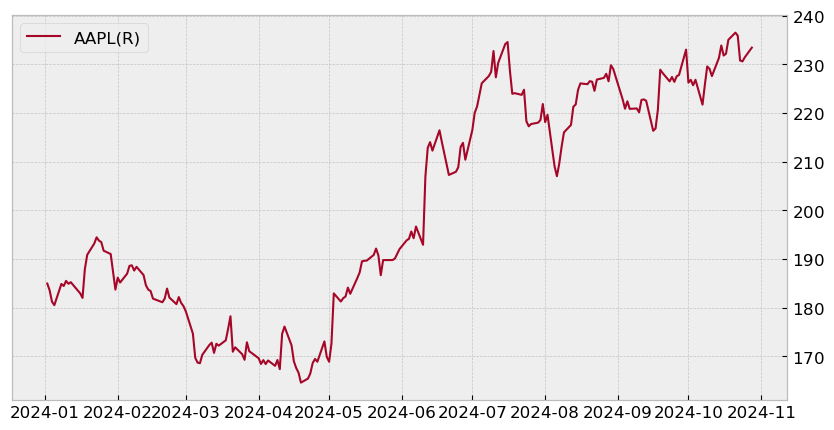

In [53]:
df = fs.get_price("AAPL", start_date="2024-01-01") #주식의 가격 정보 얻어오기

fs.draw_chart(df, right = 'AAPL') #오른쪽 열 이름 설정

In [55]:
fs.rsi(df, w = 14) #rsi가져오는 함수(window를 15일로)

,AAPL,rsi
2024-01-02,184.94,NaN
2024-01-03,183.55,NaN
2024-01-04,181.22,NaN
2024-01-05,180.50,NaN
2024-01-08,184.86,NaN
...,...,...
2024-10-22,235.86,62.12
2024-10-23,230.76,52.60
2024-10-24,230.57,52.28
2024-10-25,231.41,53.63


In [57]:
df

,AAPL,diff,au,ad,rsi
2024-01-02,184.94,NaN,NaN,NaN,NaN
2024-01-03,183.55,-1.39,NaN,NaN,NaN
2024-01-04,181.22,-2.33,NaN,NaN,NaN
2024-01-05,180.50,-0.72,NaN,NaN,NaN
2024-01-08,184.86,4.36,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-22,235.86,-0.62,1.35,0.82,62.12
2024-10-23,230.76,-5.10,1.25,1.13,52.60
2024-10-24,230.57,-0.19,1.16,1.06,52.28
2024-10-25,231.41,0.84,1.14,0.98,53.63


**차트 그리기**

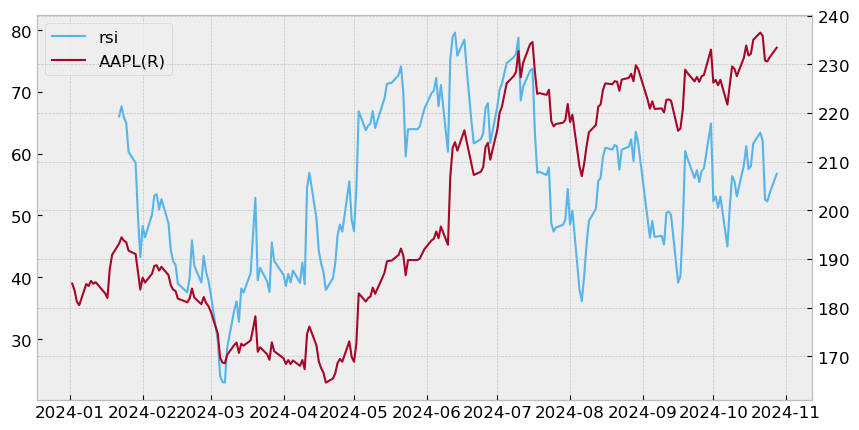

In [58]:
fs.draw_chart(df, left = "rsi", right = 'AAPL') #좌우 축 다르게 잡기

## 백테스팅 : 검증

In [59]:
fs.indicator_to_signal(df, factor = 'rsi', buy = 30, sell = 70)

2024-01-02    zero
2024-01-03    zero
2024-01-04    zero
2024-01-05    zero
2024-01-08    zero
              ... 
2024-10-22    zero
2024-10-23    zero
2024-10-24    zero
2024-10-25    zero
2024-10-28    zero
Name: trade, Length: 208, dtype: object

In [60]:
df

,AAPL,diff,au,ad,rsi,trade
2024-01-02,184.94,NaN,NaN,NaN,NaN,zero
2024-01-03,183.55,-1.39,NaN,NaN,NaN,zero
2024-01-04,181.22,-2.33,NaN,NaN,NaN,zero
2024-01-05,180.50,-0.72,NaN,NaN,NaN,zero
2024-01-08,184.86,4.36,NaN,NaN,NaN,zero
...,...,...,...,...,...,...
2024-10-22,235.86,-0.62,1.35,0.82,62.12,zero
2024-10-23,230.76,-5.10,1.25,1.13,52.60,zero
2024-10-24,230.57,-0.19,1.16,1.06,52.28,zero
2024-10-25,231.41,0.84,1.14,0.98,53.63,zero


**매수매도 타이밍**
- zz : zero에서 zero
- zl : zero에서 long 매수해서 보유 상태로 전환
- ll : long에서 long 보유 상태를 유지한다.
- lz : 매도해서 보유하지않은 상태로 전환

In [61]:
fs.position(df)

2024-01-02      
2024-01-03    zz
2024-01-04    zz
2024-01-05    zz
2024-01-08    zz
              ..
2024-10-22    zz
2024-10-23    zz
2024-10-24    zz
2024-10-25    zz
2024-10-28    zz
Name: position, Length: 208, dtype: object

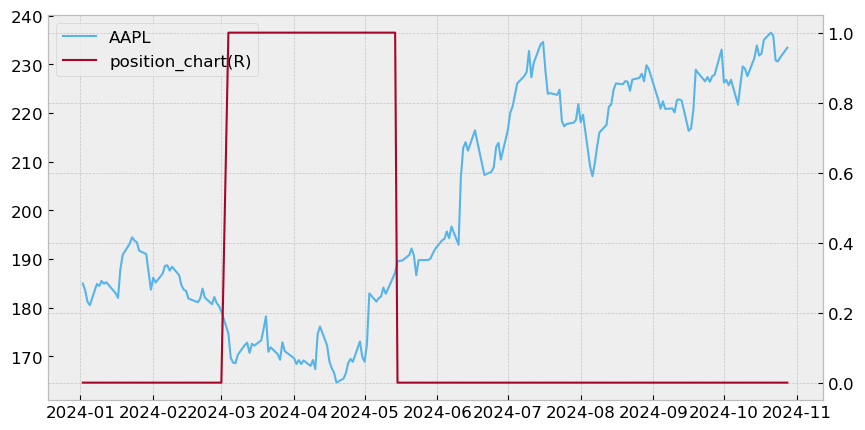

In [63]:
fs.draw_chart(df, left = 'AAPL', right = "position_chart")

**포폴, 전략 성능 평가**

In [64]:
fs.evaluate(df, cost = 0.001) # 거래 수수료 기입 (1% : 0.01)

,AAPL,diff,au,ad,rsi,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
2024-01-02,184.94,NaN,NaN,NaN,NaN,zero,,0,1.00,1.00,1.00,0.00,1.00,1.00
2024-01-03,183.55,-1.39,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.99
2024-01-04,181.22,-2.33,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.98
2024-01-05,180.50,-0.72,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.98
2024-01-08,184.86,4.36,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,235.86,-0.62,1.35,0.82,62.12,zero,zz,0,1.00,1.00,1.08,8.39,1.00,1.00
2024-10-23,230.76,-5.10,1.25,1.13,52.60,zero,zz,0,1.00,1.00,1.08,8.39,1.00,0.98
2024-10-24,230.57,-0.19,1.16,1.06,52.28,zero,zz,0,1.00,1.00,1.08,8.39,1.00,0.97
2024-10-25,231.41,0.84,1.14,0.98,53.63,zero,zz,0,1.00,1.00,1.08,8.39,1.00,0.98


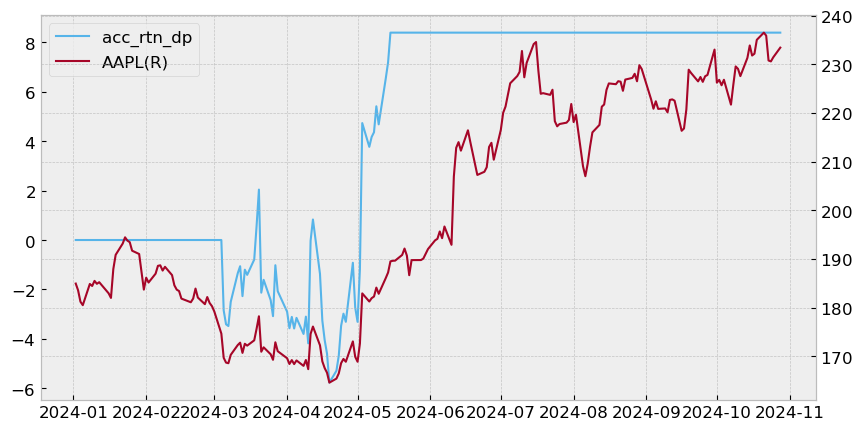

In [65]:
fs.draw_chart(df, left = "acc_rtn_dp", right = 'AAPL')

**상대 수익률 계산**
1. 연평균 수익률
2. 누적수익률
3. 평균수익률
4. 단순보유수익률
5. 거래횟수
6. 전략이 성공한 횟수
7. 성공확률
8. 투자기간
9. 샤프비율 : 위험대비 수익률
10. 최대낙폭
11. 단순보유최대낙폭

In [66]:
fs.performance(df, rf_rate = 0.03) # 무위험 수익률(은행 이자) 기입

CAGR: 10.94%
Accumulated return: 8.39%
Average return: 8.39%
Benchmark return : 20.83%
Number of trades: 1
Number of win: 1
Hit ratio: 100.00%
Investment period: 0.8yrs
Sharpe ratio: 0.50
MDD: -7.65%
Benchmark MDD: -15.35%


**애플의 매수매도 타이밍, 이익등을 그려보기**\
indicator_to_signal() : rsi로 매수 매도 신호 생성\
position() : 매수매도 신호 따라서 포지션 확인 -> buy, cell, hold\
evaluate() : 전략의 절대 수익성과 손익 평가\
performance() : 위험을 고려했을 때도 전략이 우수한지 확인

In [67]:
fs.indicator_to_signal(df, factor = 'rsi', buy = 70, sell = 30)
fs.position(df) #포지션확인 함수
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.03)

CAGR: 30.20%
Accumulated return: 23.17%
Average return: nan%
Benchmark return : 20.83%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.8yrs
Sharpe ratio: 1.22
MDD: -11.75%
Benchmark MDD: -15.35%


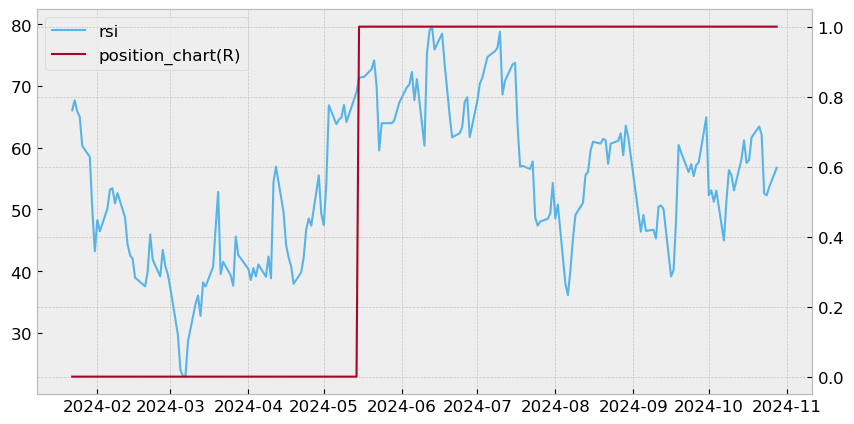

In [68]:
fs.draw_chart(df, left = 'rsi', right = "position_chart")

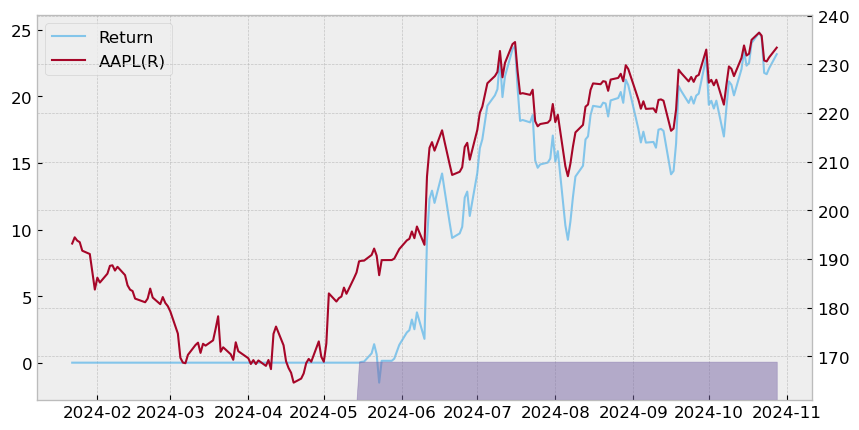

In [69]:
##거래 결과를 시각화 하는 함수
fs.draw_trade_results(df)

## 볼린저 밴드

In [71]:
df = fs.get_price("TSLA", start_date = "2024-01-01")
fs.bollinger(df, w = 20, k = 2) ##볼린저밴드 함수

,TSLA,center,ub,lb
2024-01-02,248.42,NaN,NaN,NaN
2024-01-03,238.45,NaN,NaN,NaN
2024-01-04,237.93,NaN,NaN,NaN
2024-01-05,237.49,NaN,NaN,NaN
2024-01-08,240.45,NaN,NaN,NaN
...,...,...,...,...
2024-10-22,217.97,237.63,270.59,204.66
2024-10-23,213.65,235.46,268.75,202.16
2024-10-24,260.48,235.77,269.92,201.63
2024-10-25,269.19,236.21,271.87,200.55


In [72]:
df

,TSLA,center,sigma,ub,lb
2024-01-02,248.42,NaN,NaN,NaN,NaN
2024-01-03,238.45,NaN,NaN,NaN,NaN
2024-01-04,237.93,NaN,NaN,NaN,NaN
2024-01-05,237.49,NaN,NaN,NaN,NaN
2024-01-08,240.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-22,217.97,237.63,16.48,270.59,204.66
2024-10-23,213.65,235.46,16.65,268.75,202.16
2024-10-24,260.48,235.77,17.07,269.92,201.63
2024-10-25,269.19,236.21,17.83,271.87,200.55


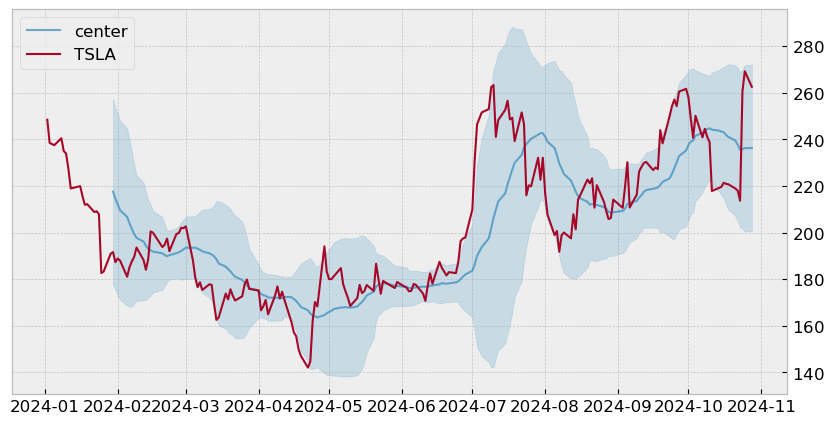

In [73]:
fs.draw_band_chart(df) #볼린저 밴드 그리는 함수

**기타 정보 추가하기**

In [74]:
fs.band_to_signal(df, buy = 'D', sell = 'A')

2024-01-02    zero
2024-01-03    zero
2024-01-04    zero
2024-01-05    zero
2024-01-08    zero
              ... 
2024-10-22     buy
2024-10-23     buy
2024-10-24     buy
2024-10-25     buy
2024-10-28     buy
Name: trade, Length: 208, dtype: object

CAGR: 43.41%
Accumulated return: 32.35%
Average return: 9.81%
Benchmark return : 37.02%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.7yrs
Sharpe ratio: 0.85
MDD: -21.01%
Benchmark MDD: -42.82%


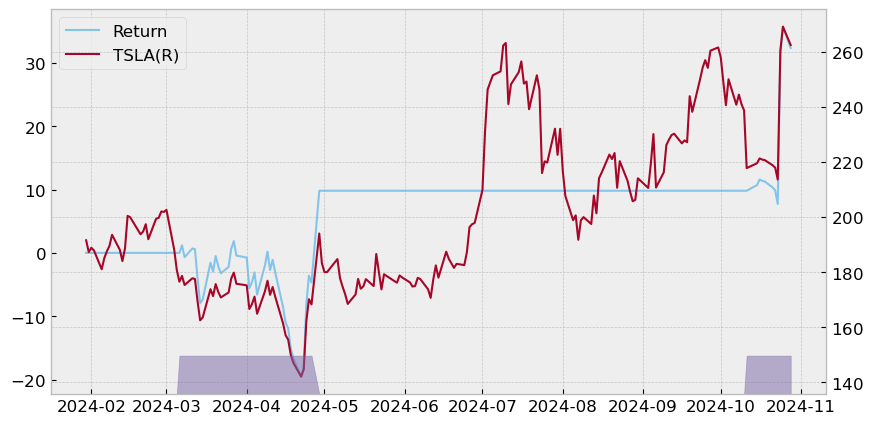

In [76]:
fs.position(df)
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.03)
fs.draw_trade_results(df)

## RSI & 볼린저 밴드

CAGR: 6.20%
Accumulated return: 4.62%
Average return: nan%
Benchmark return : 4.98%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.7yrs
Sharpe ratio: 0.27
MDD: -6.64%
Benchmark MDD: -15.49%


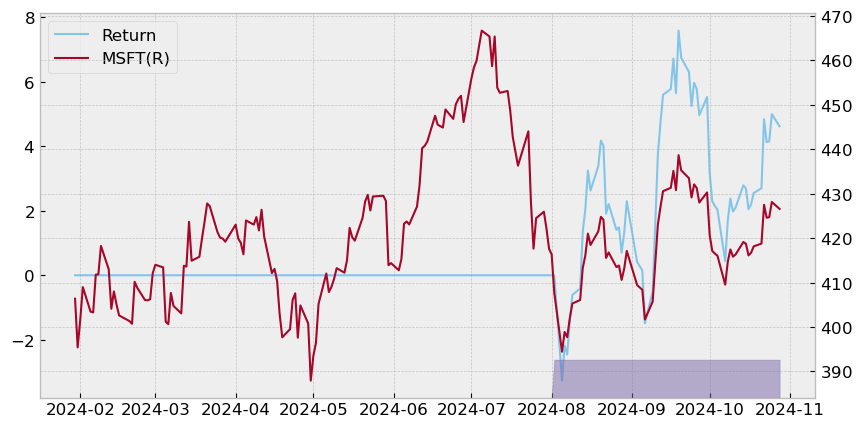

In [82]:
df = fs.get_price("MSFT", start_date = "2024-01-01")

fs.rsi(df, w = 14)
fs.bollinger(df, w = 20, k = 2)

df["s1"] = fs.indicator_to_signal(df, factor = 'rsi', buy = 30, sell = 70)
df["s2"] = fs.band_to_signal(df, buy = 'D', sell = 'A')

fs.combine_signal_and(df, "s1", "s2")

fs.position(df)
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.03)
fs.draw_trade_results(df)